In [ ]:
!pip install --quiet tensorflow


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - loss: 0.1775 - val_loss: 0.2938
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0946 - val_loss: 0.1171
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0357 - val_loss: 0.0327
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0334 - val_loss: 0.0214
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0533 - val_loss: 0.0245
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0383 - val_loss: 0.0404
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0305 - val_loss: 0.0699
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0313 - val_loss: 0.0931
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0337 - val_loss: 0.1013
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0361 - val_loss: 0.0951
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0365 - val_loss: 0.0807
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 0.0310 - val_loss: 0.0682
Epoch

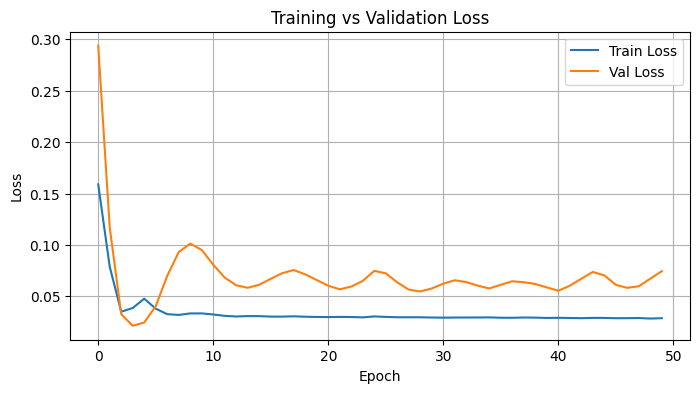

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


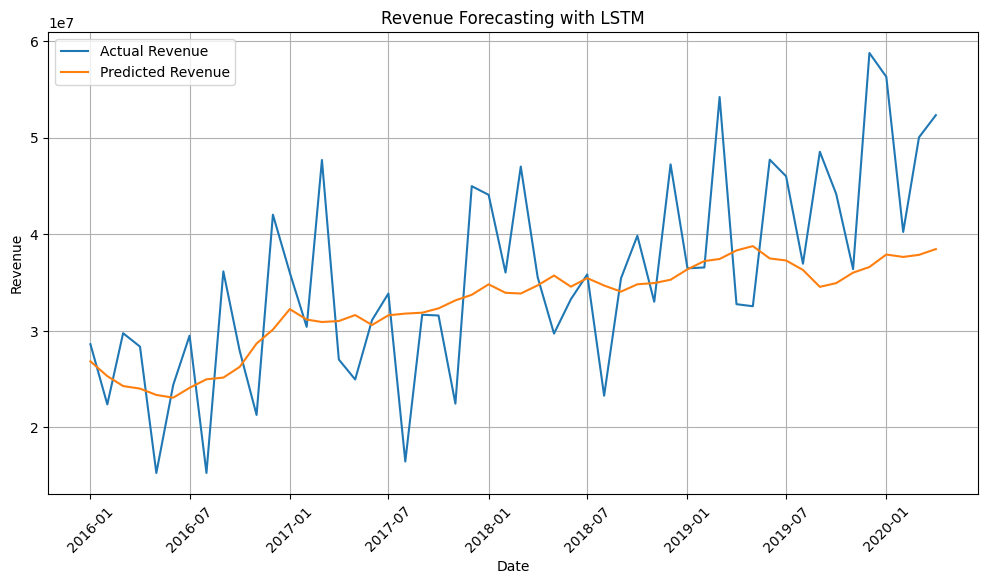

In [ ]:
# 📦 Install required packages (in Colab)
!pip install --quiet pandas numpy matplotlib scikit-learn tensorflow

# 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 📁 Load Dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/TS/Exp9/data.csv'  # Change if needed
df = pd.read_csv(file_path, parse_dates=['Period'], dayfirst=True)
df = df.sort_values('Period')  # Sort by date

# 🧼 Drop rows with missing values if any
df = df.dropna()

# ✅ Select features
features = ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
target_col = 'Revenue'
input_cols = ['Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']

# Separate target and input features
target = df[[target_col]]
inputs = df[input_cols]

# Scale target and input separately
input_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_inputs = input_scaler.fit_transform(inputs)
scaled_target = target_scaler.fit_transform(target)

# Combine target + inputs for sequence creation
scaled_data = np.hstack([scaled_target, scaled_inputs])

# ⏳ Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 1:])  # inputs only
        y.append(data[i, 0])  # target only
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_data, window_size)

# 🧠 Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 🏋️ Train the model
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# 📉 Plot training vs validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 📈 Make predictions
predicted_scaled = model.predict(X)
predicted = target_scaler.inverse_transform(predicted_scaled)
actual = target_scaler.inverse_transform(y.reshape(-1, 1))

# 📅 Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(df['Period'].values[window_size:], actual, label='Actual Revenue')
plt.plot(df['Period'].values[window_size:], predicted, label='Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Forecasting with LSTM')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
